## 파이썬 라이브러리를 활용한 데이터 분석과 시각화

### numpy
* numpy는 n차원 데이터를 빠르고 쉽게 계산할 수 있게 해 주는 라이브러리입니다.
*  https://numpy.org/

### pandas
* pandas는 데이터 분석과 조작을 도와주는 라이브러리입니다.
*  https://pandas.pydata.org/

##  시각화 도구

<img src="https://rougier.github.io/python-visualization-landscape/landscape-colors.png">

### matplotlib
* https://matplotlib.org/

### matplotlib.pyplot
* pyplot은 matplotlib에 대한 상태 기반 인터페이스입니다.
* 파이썬의 가장 인기있는 데이터 시각화 도구입니다.
*  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

### seaborn
* seaborn은 matplotlib에 기반한 통계적 데이터 시각화 지원 라이브러리입니다.
* pyplot을 사용하기 쉽게 추상화 한 시각화 도구 입니다.
*  https://seaborn.pydata.org/

### pandas visualization
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


In [1]:
# pandas, numpy, seaborn, matplotlib.pyplot 을 불러옵니다.
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
# 저장한 Dataframe을 불러와 변수 df에 지정해줍니다.
# kosis-cancer.csv
df = pd.read_csv("data/kosis-cancer.csv", encoding="cp949")
df.shape

(1238, 7)

In [7]:
df.head(2)

,연령별,시점,암검진별,성별,대상인원,수검인원,연령대
0,20 ~ 24세,2016,위암,남자,NaN,NaN,20대
1,20 ~ 24세,2016,위암,여자,NaN,NaN,20대


In [8]:
df.tail(2)

,연령별,시점,암검진별,성별,대상인원,수검인원,연령대
1236,85세 이상,2019,자궁경부암,남자,NaN,NaN,80대
1237,85세 이상,2019,자궁경부암,여자,165503.0,9123.0,80대


## 한글폰트 설정하기

In [16]:
# 데이터 시각화 도구에서 한글을 그대로 출력하게 되면 글자가 깨져서 나오게 되기 때문에 글꼴설정을 해줘야 한다.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family

In [10]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러와줍니다.
get_font_family()

'AppleGothic'

In [12]:
import matplotlib.pyplot as plt

# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family라는 변수에 할당합니다.
plt.style.use("ggplot")

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

### 폰트설정 확인하기

<AxesSubplot:title={'center':'한글'}>

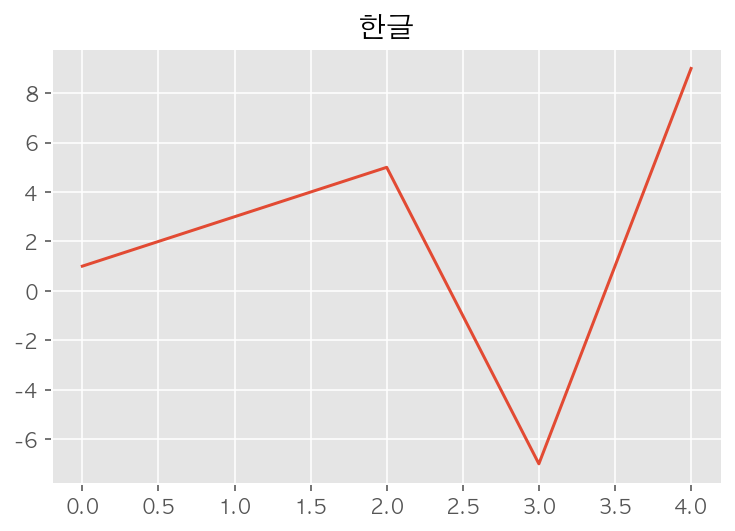

In [15]:
# 한글 폰트가 정상적으로 작동하는지 확인하기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

## 한 개의 변수 빈도수 구하고 시각화 하기
* Keyword

    * Series.value_counts()
    * Series.value_counts().plot()
    * Series.value_counts().plot.bar()
    * Series.value_counts().plot.barh()
    * sns.countplot()

In [18]:
# "암검진별" column의 value별 개수를 확인해 봅니다.
df["암검진별"].value_counts()

위암       252
간암       252
대장암      248
자궁경부암    244
유방암      242
Name: 암검진별, dtype: int64

<AxesSubplot:xlabel='암검진별', ylabel='count'>

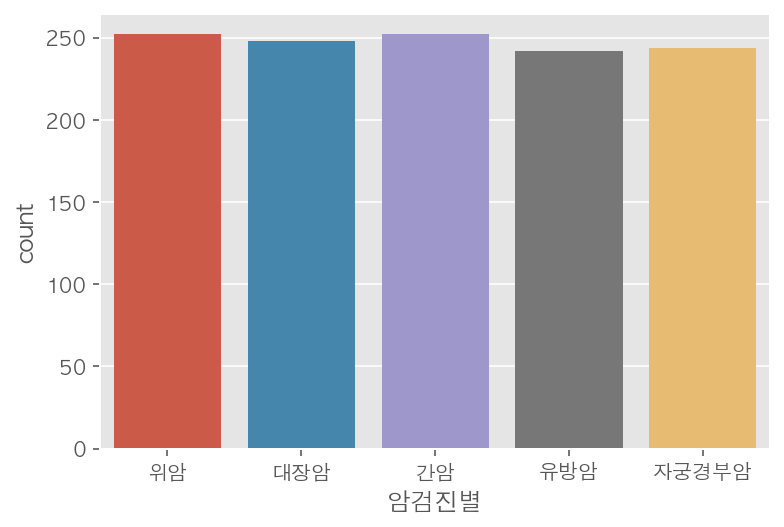

In [21]:
# seaborn을 활용하여 암검진별 빈도수를 표현할 수 있습니다.
# 집계된 데이터의 수이기 때문에 암검진수와는 연관이 없다. 집계된 데이터의 갯수를 의미합니다. 
"""암검진수로 해석하지 않도록 주의해주세요!"""
sns.countplot(data=df, x="암검진별")

<AxesSubplot:xlabel='암검진별', ylabel='count'>

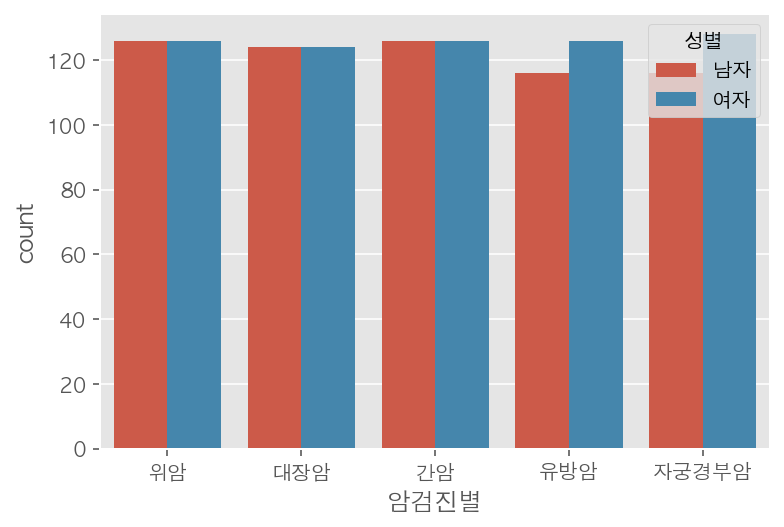

In [22]:
# seaborn countplot을 활용하여 암검진별 집계 데이터 빈도수를 표현 합니다. 
# hue="성별"에 따라 다른 색상으로 표현합니다.
"""암검진 빈도수가 아니라는 것에 주의해 주세요!"""
sns.countplot(data=df, x="암검진별", hue="성별")

In [28]:
# 데이터가 0 인것은 빈도수 계산에서 제외하도록
# 대상인원 이 0 보다 큰 데이터만 찾습니다.
df = df[df["대상인원"].notnull()].copy()
df.shape

(830, 7)

<AxesSubplot:xlabel='암검진별', ylabel='count'>

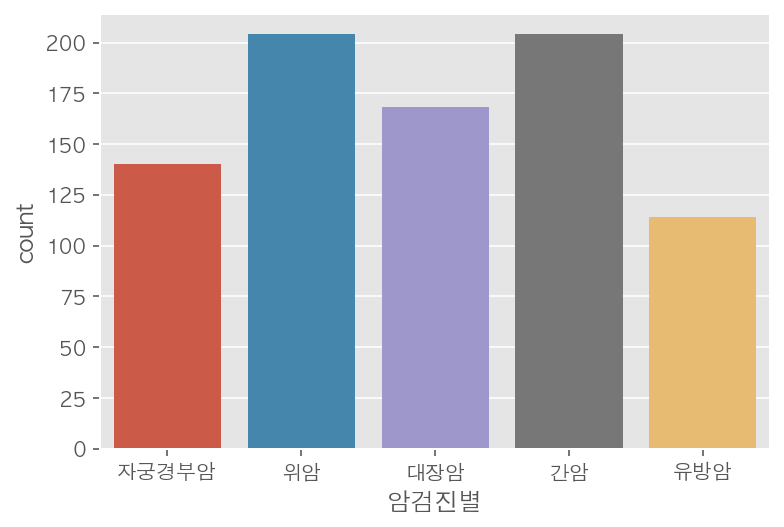

In [29]:
# 데이터 > 0 보다 큰 데이터로 빈도수 시각화 해보기
# 결측치를 제외한 집계 데이터의 빈도수
"""암검진수가 아님을 주의해 주세요!"""
sns.countplot(data=df, x="암검진별")

In [39]:
df = df[df["대상인원"] > 0].copy()
df.shape

(788, 7)

<AxesSubplot:xlabel='암검진별', ylabel='count'>

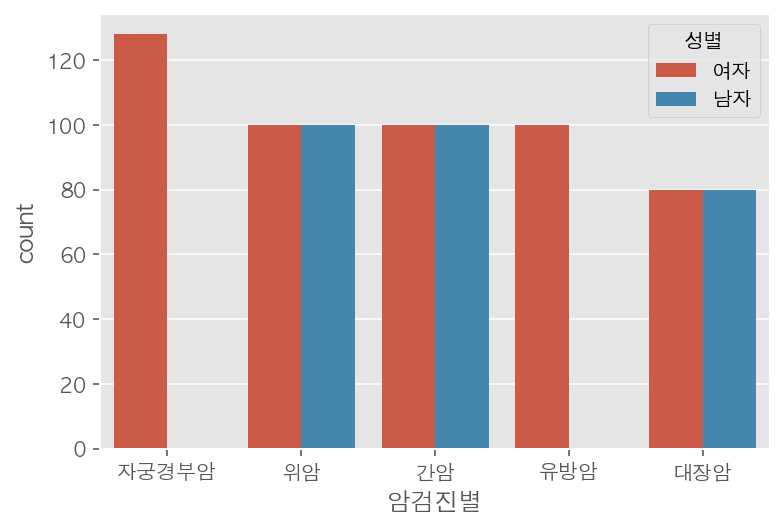

In [40]:
sns.countplot(data=df, x="암검진별", hue="성별")

In [41]:
df[(df["암검진별"] == "자궁경부암") & (df["성별"] == "남자")]

,연령별,시점,암검진별,성별,대상인원,수검인원,연령대


### crosstab 으로 두 개의 빈도수 구하기

In [42]:
# crosstab 으로 시각화 결과를 구하기 df["성별"], df["암검진별"]
# 남성의 경우 항목이 있는지 여부를 표시하고 있기 때문에 실제 대상인원은 0이라도 해당 항목이 표시됩니다.
"""데이터의 빈도수이지 암검진수가 아닙니다."""
pd.crosstab(df["성별"], df["암검진별"])

암검진별,간암,대장암,위암,유방암,자궁경부암
성별,,,,,
남자,100,80,100,0,0
여자,100,80,100,100,128


## 수치형 데이터

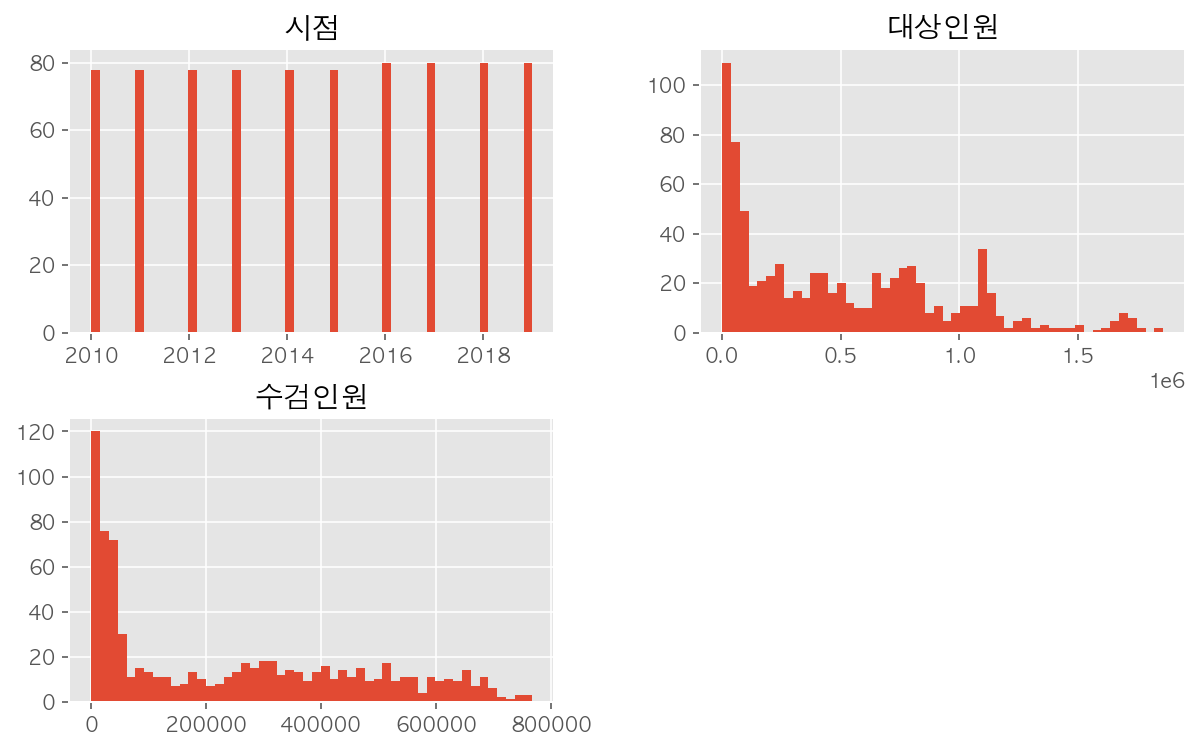

In [46]:
# .hist 를 사용하면 전체 수치 데이터에 대한 시각화를 할 수 있습니다.
df.hist(figsize=(10, 6), bins=50)
plt.show()

## 2019 년 데이터만 보기

In [50]:
# 2019년의 데이터를 확인하기 위해 2019년의 데이터만 지정해줍니다.
df_2019 = df[df["시점"] == 2019]
df_2019.head(1)

,연령별,시점,암검진별,성별,대상인원,수검인원,연령대
39,20 ~ 24세,2019,자궁경부암,여자,616456.0,184179.0,20대


<AxesSubplot:xlabel='암검진별', ylabel='수검인원'>

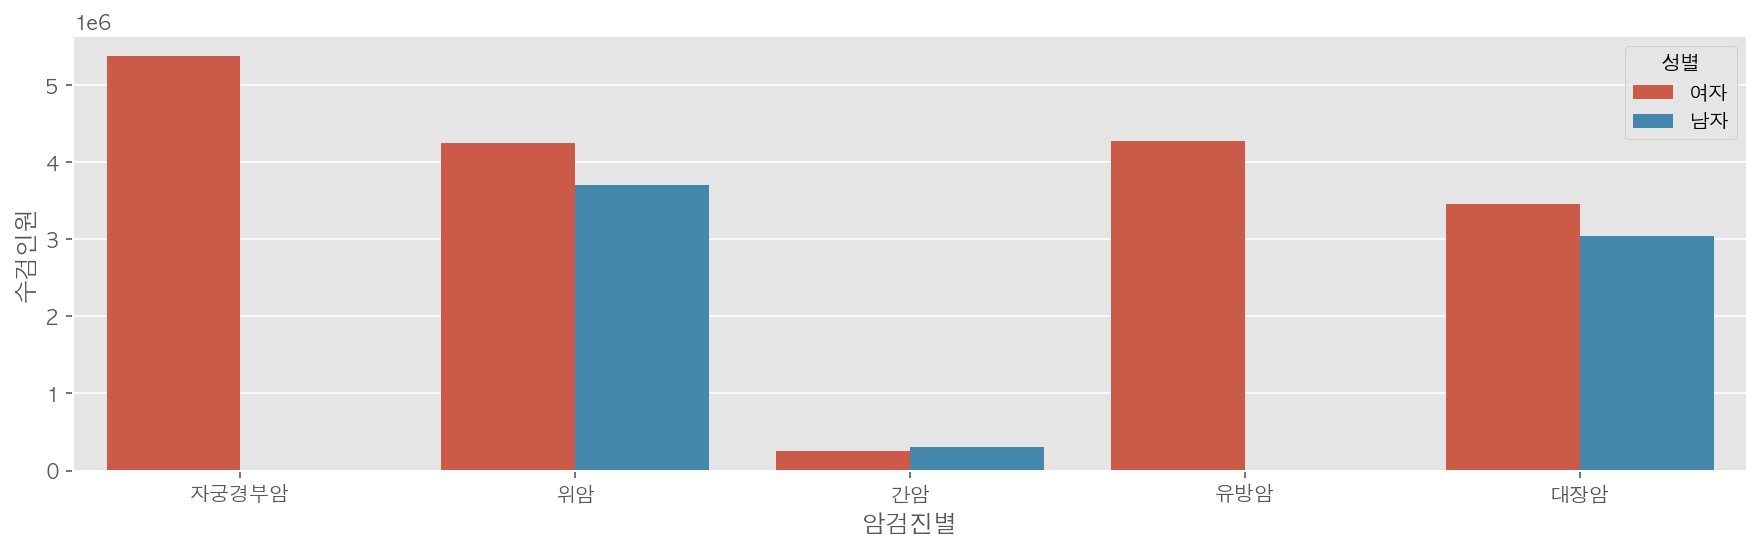

In [55]:
# seaborn의 barplot을 사용해서 데이터를 시각화 할 수 있습니다.
# x축에는 암검진별, y축에는 데이터, hue값에는 성별을 넣어줍니다.
# 2019년 남자와 여자의 암검진별 수검인원을 비교합니다.
plt.figure(figsize=(15, 4))
sns.barplot(data=df_2019, x="암검진별", y="수검인원", hue="성별",
            estimator=np.sum, ci=None)

<Figure size 1728x432 with 0 Axes>

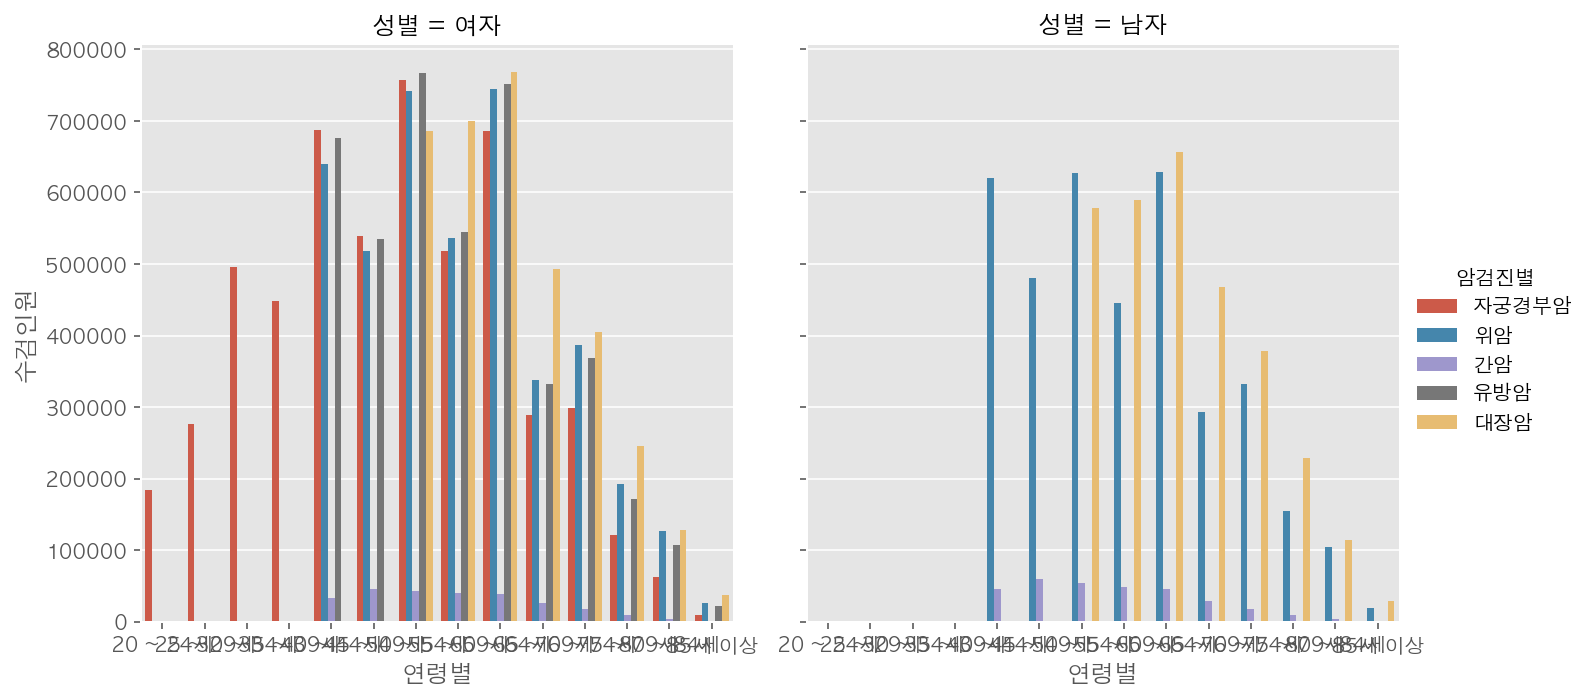

In [62]:
# 2019년의 x="연령별", y='수검인원', hue='암검진별', kind="bar", col="성별" 시각화
plt.figure(figsize=(24, 6))
sns.catplot(data=df_2019, x="연령별", y="수검인원", hue="암검진별",kind="bar", col="성별",
            estimator=np.sum, ci=None)

## 연도별 암검진 현황
### 평균 시각화

In [56]:
# pointplot 으로 연도별 암검진 **평균** 수검인원을 시각화 합니다.
"""평균 계산으로 실수하지 않도록 주의해 주세요!"""

'평균 계산으로 실수하지 않도록 주의해 주세요!'

### 합계 시각화

<Figure size 1728x432 with 0 Axes>

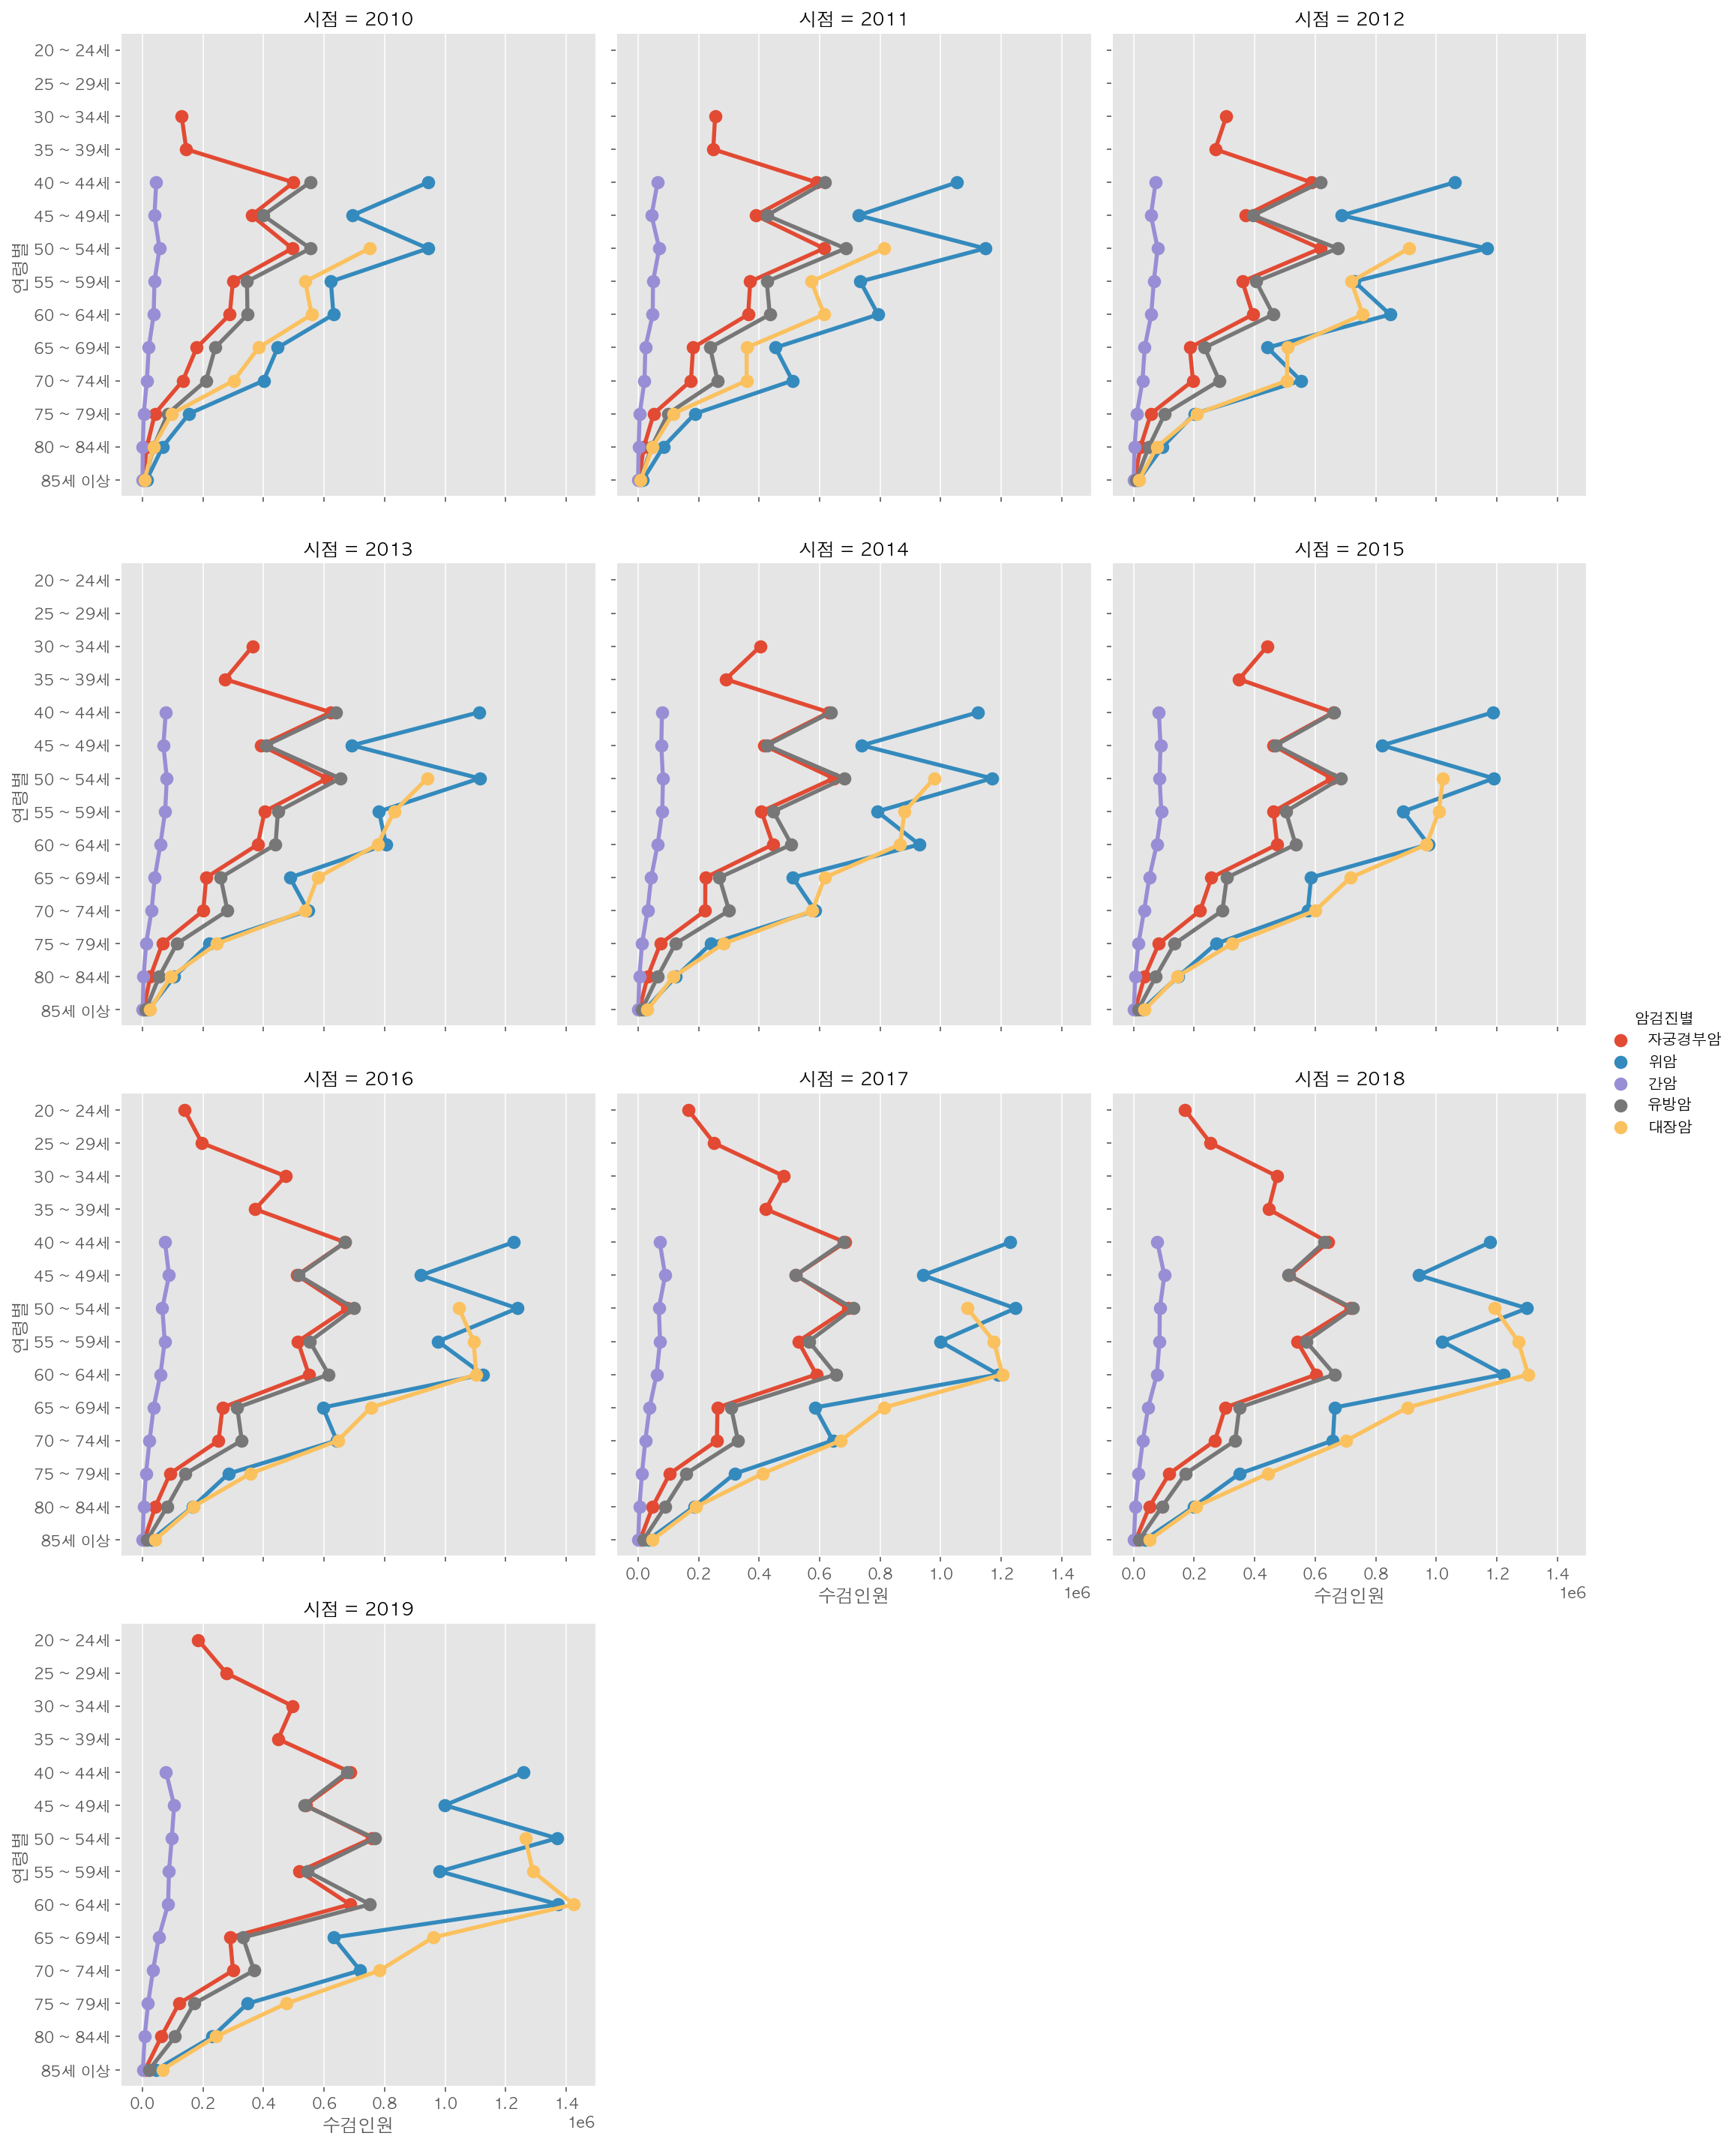

In [69]:

plt.figure(figsize=(24, 6))
sns.catplot(data=df, x="수검인원", y="연령별", hue="암검진별", kind="point", col="시점", col_wrap=3,
            estimator=np.sum, ci=None)

<Figure size 1728x432 with 0 Axes>

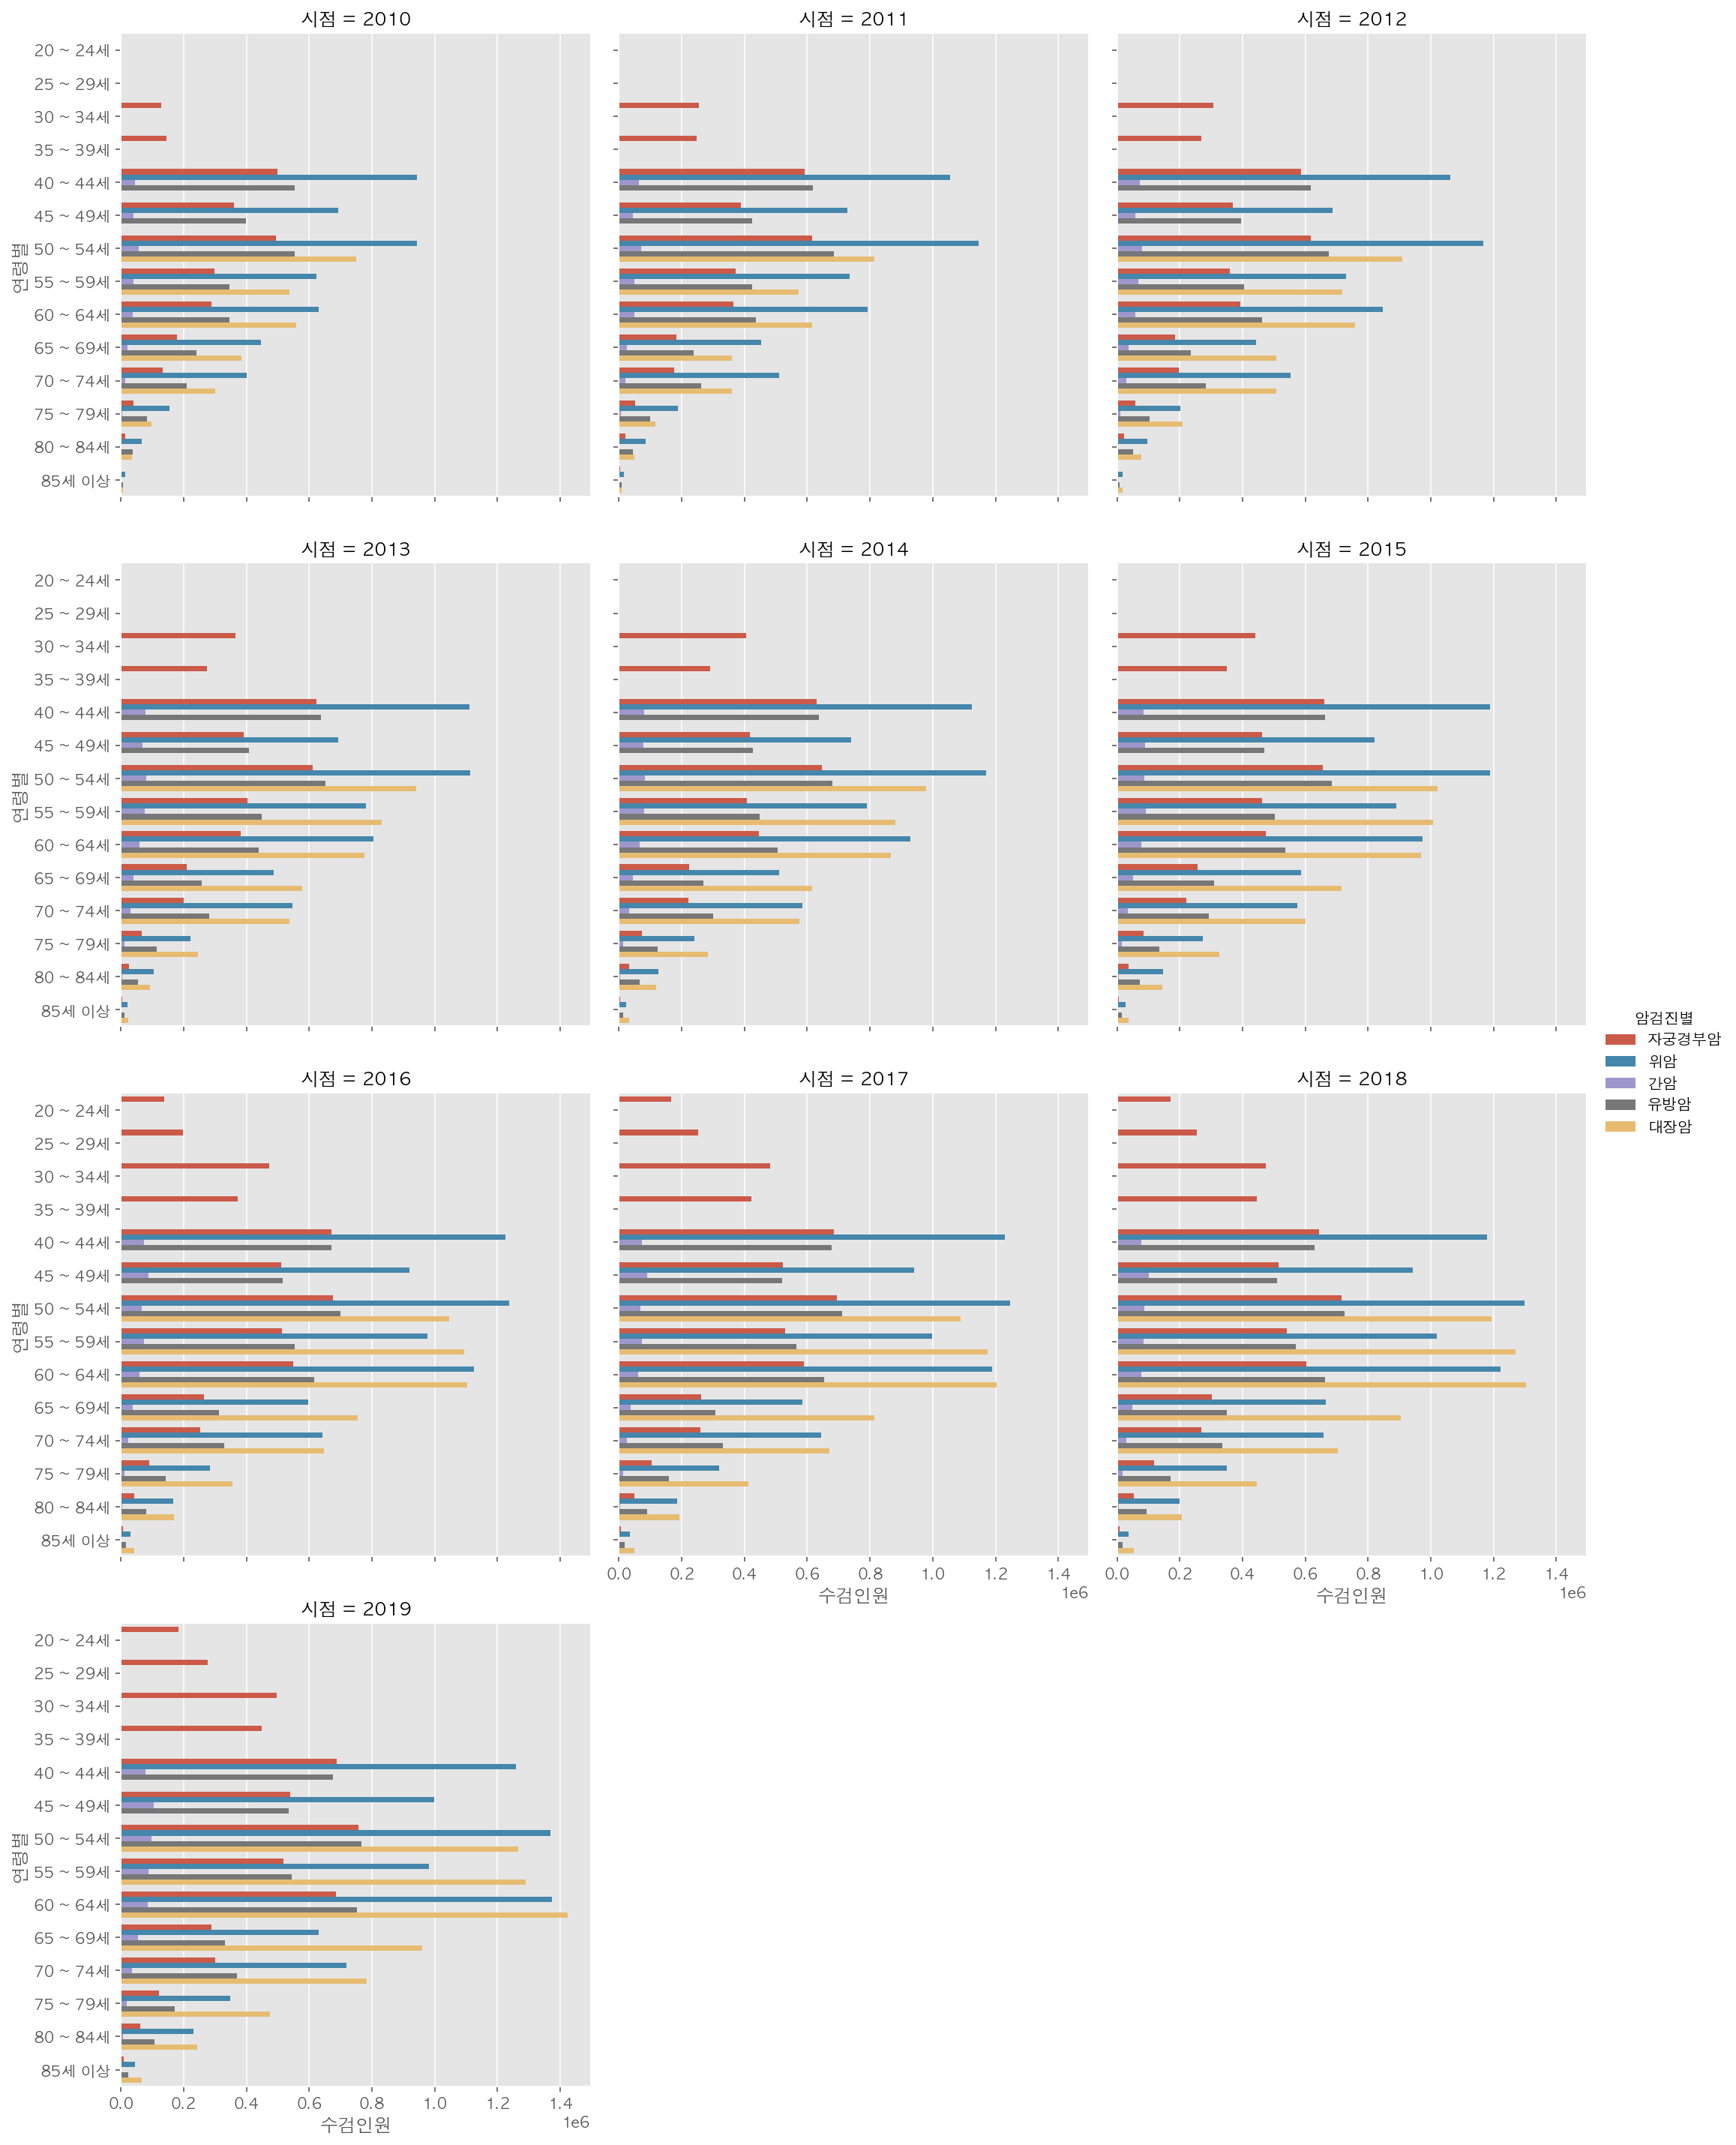

In [68]:
# pointplot 으로 연도별 암검진 **합계** 수검인원을 시각화 합니다.

plt.figure(figsize=(24, 6))
sns.catplot(data=df, x="수검인원", y="연령별", hue="암검진별", kind="bar", col="시점", col_wrap=3,
            estimator=np.sum, ci=None)

<Figure size 1728x432 with 0 Axes>

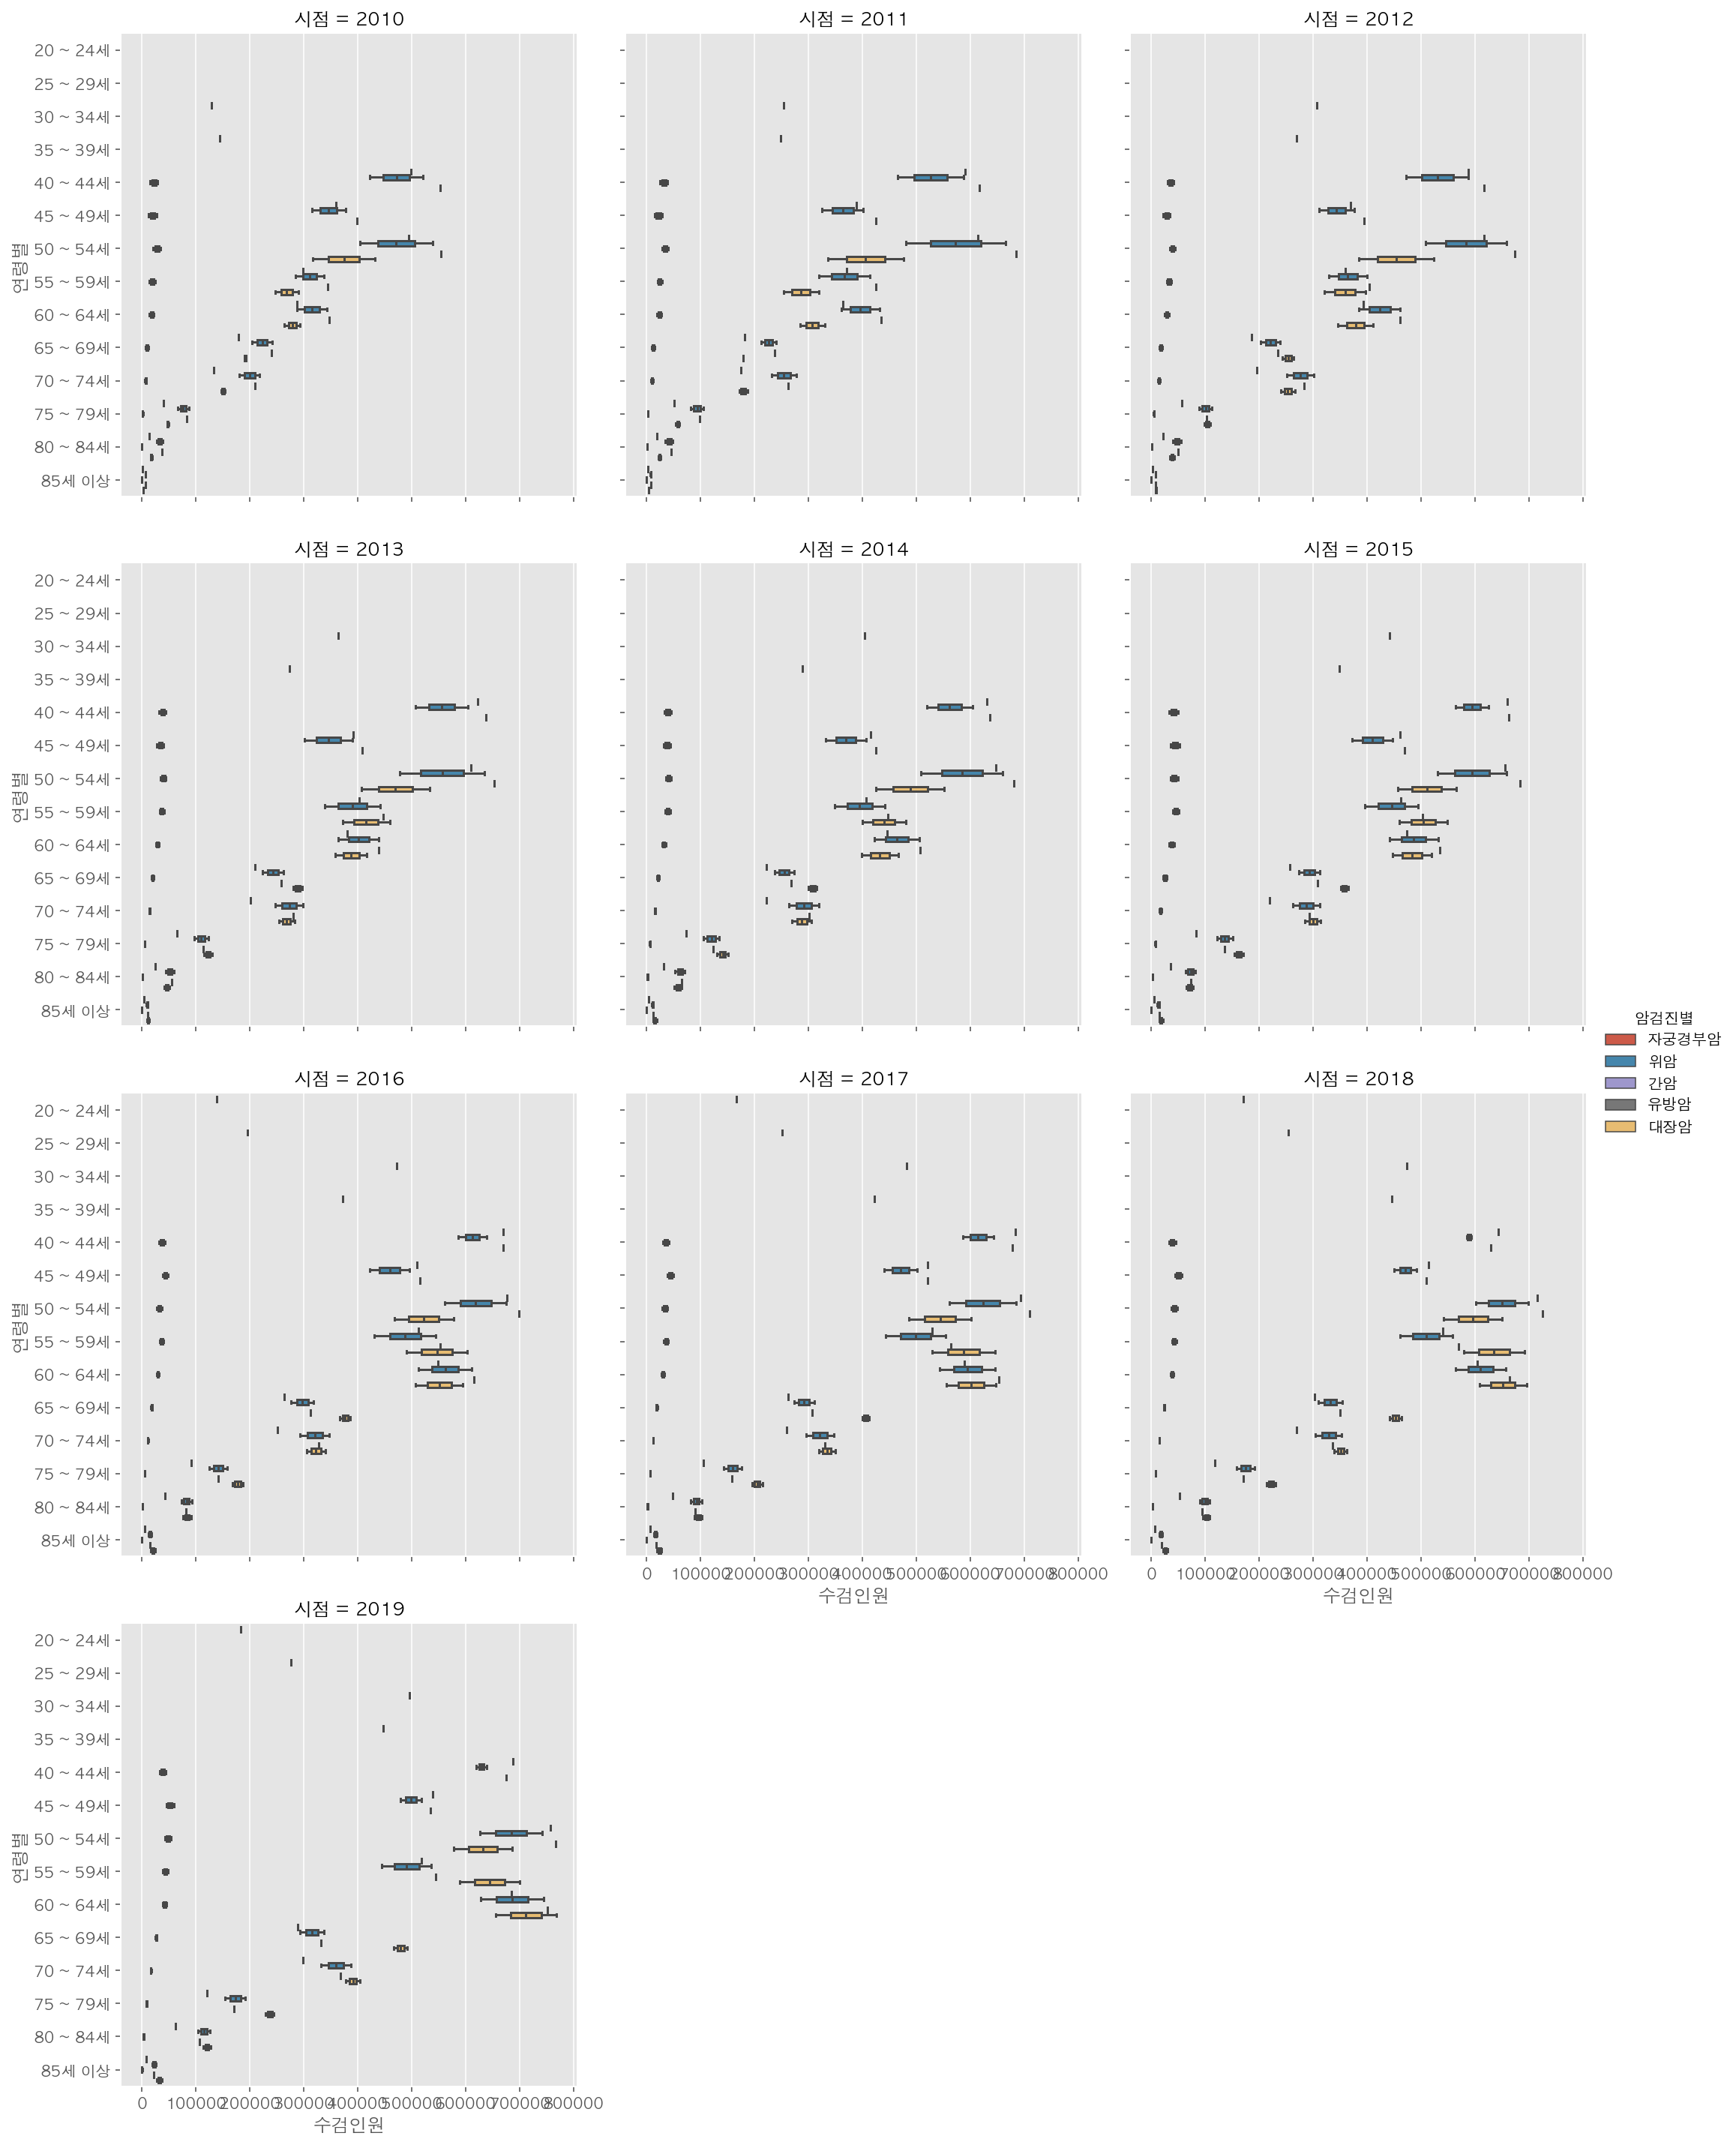

In [70]:
# catplot 으로 연도별 암검진 수검인원을 시각화 합니다.

plt.figure(figsize=(24, 6))
sns.catplot(data=df, x="수검인원", y="연령별", hue="암검진별", kind="box", col="시점", col_wrap=3,
            estimator=np.sum, ci=None)

<Figure size 1728x432 with 0 Axes>

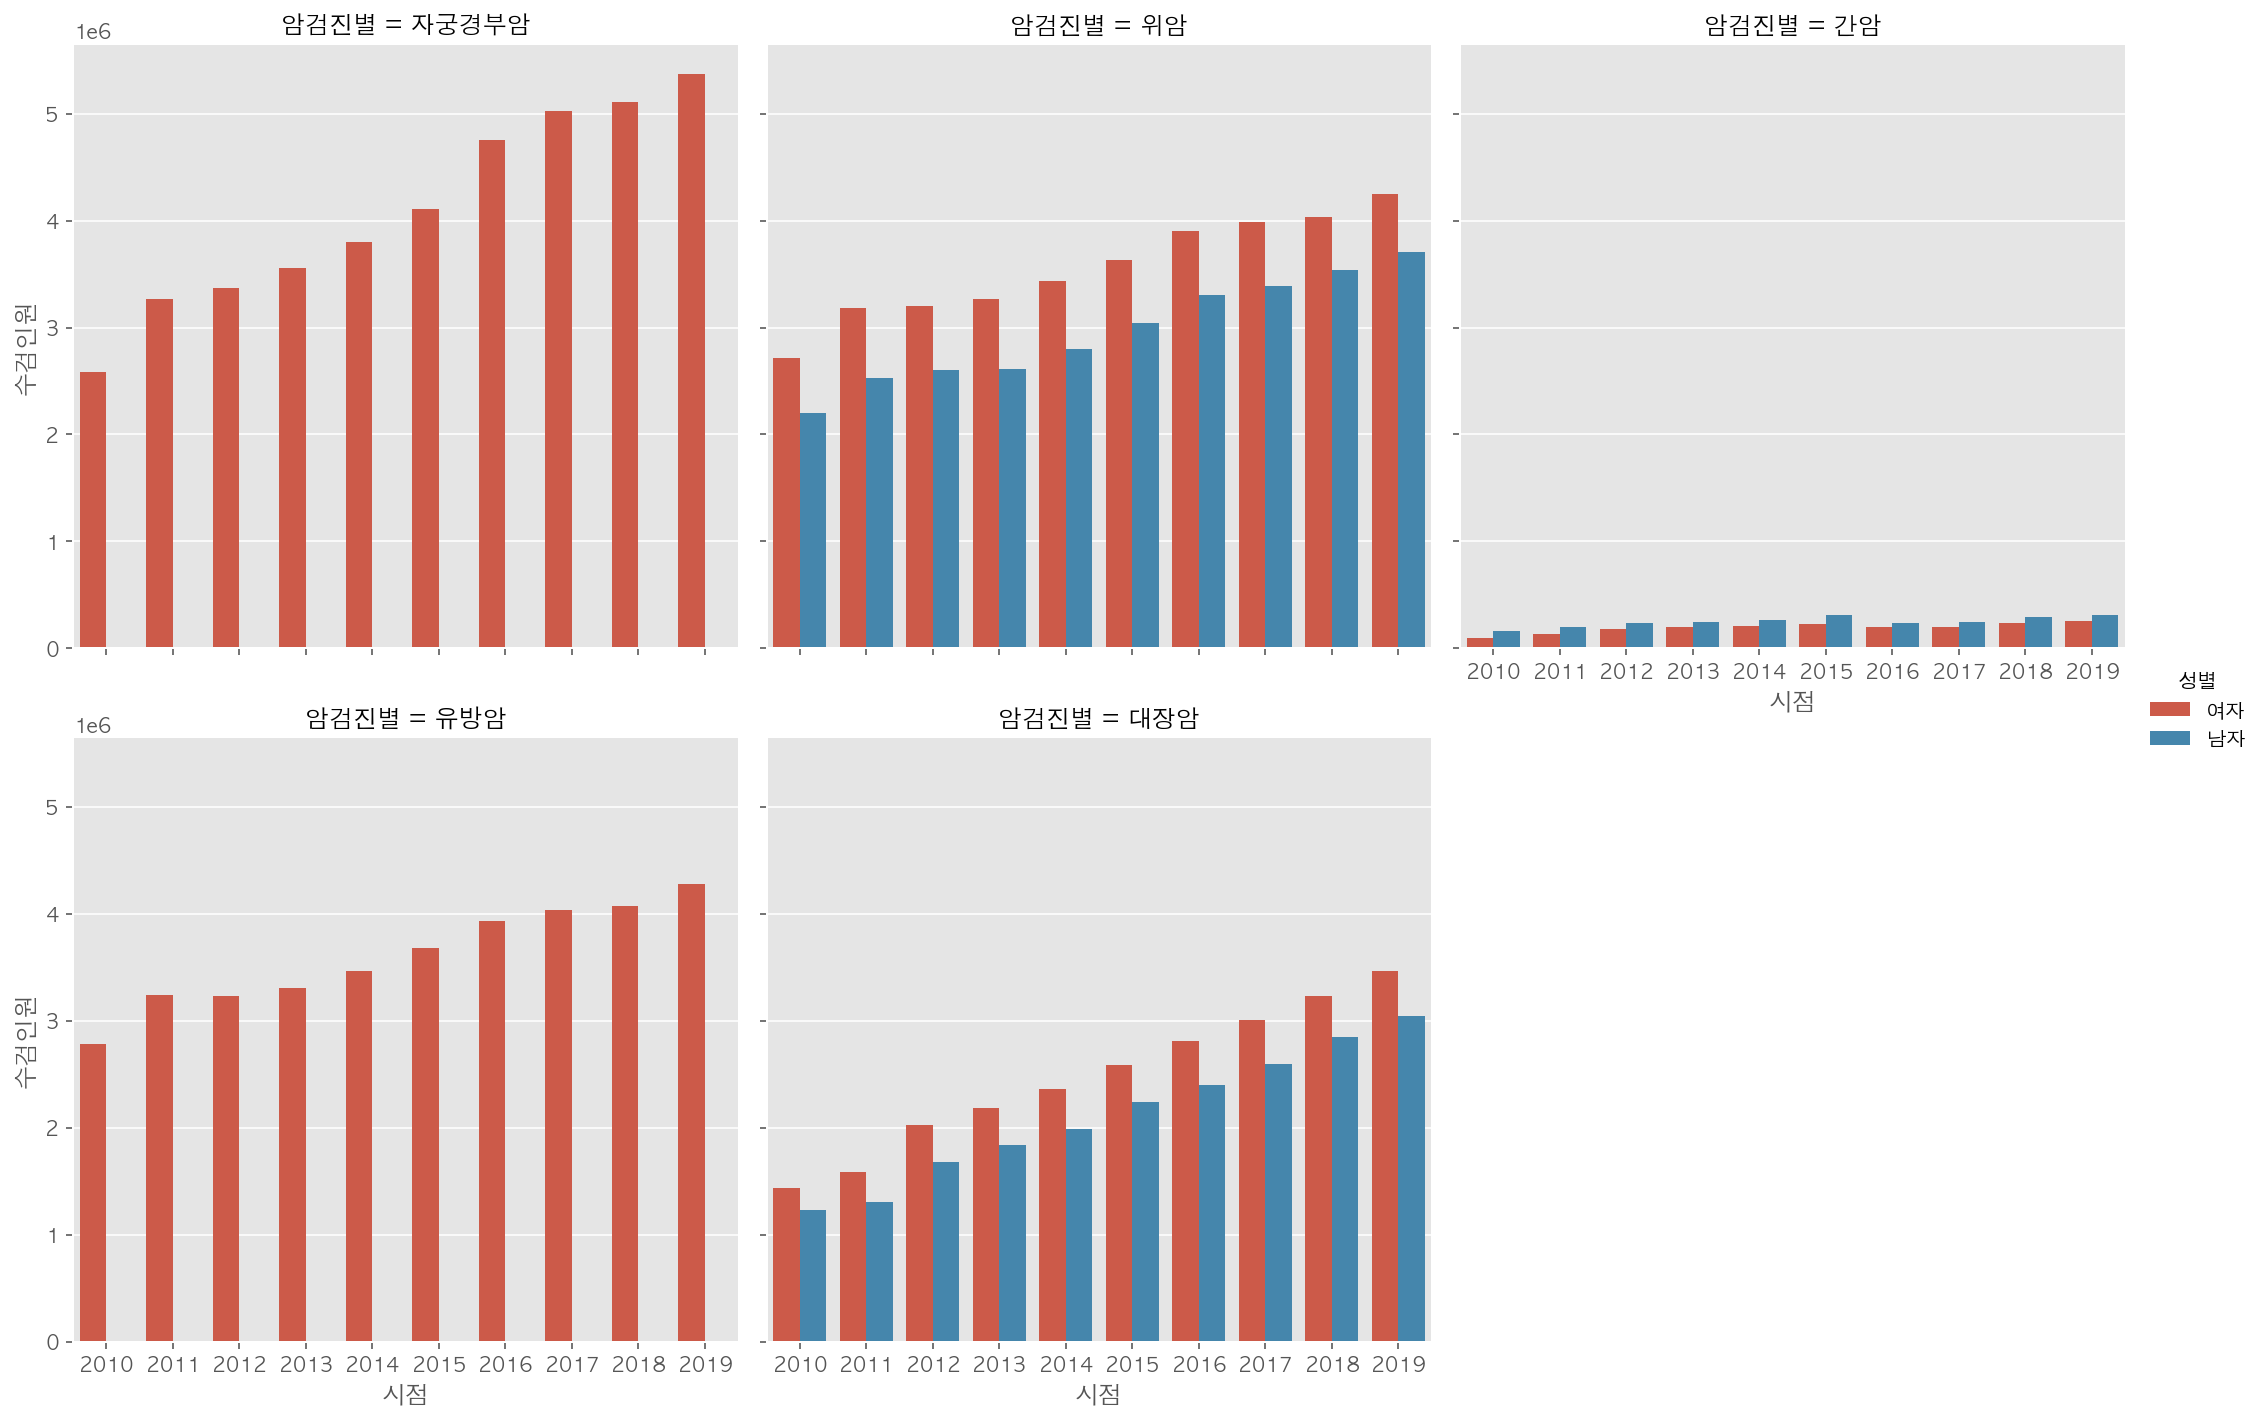

In [72]:
# catplot 으로 연도별 암검진 수검인원 **합계**를 pointplot으로 시각화 합니다.

plt.figure(figsize=(24, 6))
sns.catplot(data=df, x="시점", y="수검인원", hue="성별", kind="bar", col="암검진별", col_wrap=3,
            estimator=np.sum, ci=None)

## groupby와 pivot_table활용해보기

<img src = 'https://pandas.pydata.org/docs/_images/06_groupby.svg' width="800">

<img src = 'https://pandas.pydata.org/docs/_images/reshaping_pivot.png' width = '600'>

In [74]:
# groupby([인덱스 컬럼 리스트])[연산에 사용할 컬럼].연산()

df.groupby(["암검진별", "성별"])["수검인원"].sum().unstack()

성별,남자,여자
암검진별,,
간암,2523870.0,1934754.0
대장암,21171854.0,24689857.0
위암,29714515.0,35609235.0
유방암,NaN,36020476.0
자궁경부암,NaN,40945224.0


In [75]:
# pivot_table로 같은 결과가 나오게 연산하기
pd.pivot_table(data=df, index="암검진별", columns="성별", values="수검인원", aggfunc="sum")

성별,남자,여자
암검진별,,
간암,2523870.0,1934754.0
대장암,21171854.0,24689857.0
위암,29714515.0,35609235.0
유방암,NaN,36020476.0
자궁경부암,NaN,40945224.0
